# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [73]:
! git clone https://github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

**Question 1.1**

In [ ]:
cars = pd.read_csv("assignment4/data/cars_hw.csv")

In [ ]:
print(cars.columns)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


In [ ]:
cars.isna().sum().sum()

0

In [ ]:
def drop_missing_rows(cars):
    return cars.dropna()

In [ ]:
cars['No_of_Owners'] = cars['No_of_Owners'].replace({'1st': 1, '2nd': 2})

In [ ]:
cars['Age'] = 2023 - cars['Make_Year']

In [ ]:
cars['Price'] = (cars['Price']) / 100.0

In [ ]:
print(cars.head)

<bound method NDFrame.head of      Unnamed: 0           Make  Make_Year   Color  Body_Type  Mileage_Run  \
0             1     Volkswagen       2017  silver      sedan        44611   
1             2        Hyundai       2016     red  crossover        20305   
2             3          Honda       2019   white        suv        29540   
3             4        Renault       2017  bronze  hatchback        35680   
4             5        Hyundai       2017  orange  hatchback        25126   
..          ...            ...        ...     ...        ...          ...   
971         972        Hyundai       2018   white      sedan        23869   
972         973        Hyundai       2019   white      sedan        14831   
973         974        Hyundai       2014  silver      sedan        52846   
974         975           Ford       2020   white  crossover        28335   
975         976  Maruti Suzuki       2018  silver  hatchback        41176   

    No_of_Owners  Seating_Capacity Fuel_Type 

**Question 1.2**

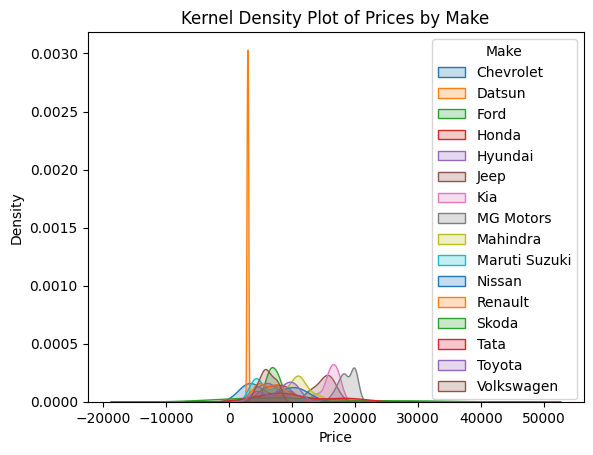

               count          mean           std      min      25%      50%  \
Make                                                                          
Chevrolet        6.0   4535.000000   2466.063665   2670.0   2885.0   3455.0   
Datsun           3.0   2896.666667    105.039675   2790.0   2845.0   2900.0   
Ford            52.0   7211.730769   1409.276996   2900.0   6350.0   7075.0   
Honda           73.0   7989.726027   2665.090666   3160.0   5810.0   7850.0   
Hyundai        305.0   6918.918033   2791.597085   2480.0   4850.0   6380.0   
Jeep             4.0  14995.000000   1525.133874  12900.0  14475.0  15295.0   
Kia              8.0  16147.500000   1190.567092  13690.0  15790.0  16285.0   
MG Motors       35.0  18694.571429   1216.611357  15890.0  17865.0  18480.0   
Mahindra        18.0  11001.666667   1755.493060   7960.0  10370.0  10945.0   
Maruti Suzuki  293.0   5887.849829   2160.198609   2370.0   4110.0   5270.0   
Nissan           4.0   8842.500000   2895.598672   4

In [ ]:
price_summary = cars.groupby('Make')['Price'].describe()

for make, data in cars.groupby('Make'):
    sns.kdeplot(data['Price'], label=make, fill=True)

plt.title('Kernel Density Plot of Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make')


plt.show()
print(price_summary)

MG Motors has the highest mean price and also the highest overall price at 20,190. Jeep and Kia are the next two highest priced cars. A majority of cars are grouped around 10,000 with two major humps coming just before 10,000 and another major hump coming around 15,000.

**Question 1.3**

In [ ]:
from sklearn.model_selection import train_test_split

X = cars.drop('Price', axis=1)
y = cars['Price']

random_state = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

**Question 1.4**

In [ ]:
from sklearn.linear_model import LinearRegression

vars = ['Age', 'Mileage_Run', 'Seating_Capacity']
X = cars.loc[:,vars]

reg = LinearRegression().fit(X, y) # Fit the linear model
print((reg.intercept_)) # Intercept value
print((reg.coef_)) # Regression coefficients
print((reg.score(X, y))) # R squared measure


X_train = X_train.loc[:, vars]
X_test = X_test.loc[:, vars]

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = reg.score(X_test, y_test)
print('R squared on test set:', r2)

rmse = ((1-r2) * (y_test.var()))**0.5
print('RMSE on test set:', rmse)


8373.064360682496
[-8.43534793e+02  3.05441294e-02  5.61243584e+02]
0.312410633717638
R squared on test set: 0.324516732341919
RMSE on test set: 3053.288635431482


In [ ]:
vars2 = ['Fuel_Type', 'No_of_Owners', 'Transmission_Type']

dummy = pd.DataFrame([])
for i in vars2:
    vars_dummy = pd.get_dummies(cars.loc[:, i], drop_first=True, dtype=int)
    dummy = pd.concat([dummy, vars_dummy], axis=1, ignore_index=True)


y = cars['Price']
X = dummy


X_train_c, X_test_c, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

reg_c = LinearRegression().fit(X_train_c, y_train)
y_hat_c = reg_c.predict(X_test_c)


r2_c = reg_c.score(X_test_c, y_test)
print('Categorical only Rsq:', r2_c)


rmse_c = ((1-r2_c) * (y_test.var()))**0.5
print('Categorical only RMSE:', rmse_c)



Categorical only Rsq: 0.28797980892512676
Categorical only RMSE: 3134.77747936536


The first model performed better on the testing set. The first model has a higher R^2 by 0.04 and had a lower RMSE by about 73.

In [ ]:
vars_numeric = ['Age', 'Mileage_Run', 'Seating_Capacity']
X_numeric = cars.loc[:, vars_numeric]

vars_cat = ['Fuel_Type', 'No_of_Owners', 'Transmission_Type']
dummy = pd.DataFrame([])
for i in vars_cat:
    vars_dummy = pd.get_dummies(cars.loc[:, i], drop_first=True, dtype=int)
    dummy = pd.concat([dummy, vars_dummy], axis=1, ignore_index=True)

X_both = pd.concat([X_numeric, dummy], axis=1)

X_both.columns = X_both.columns.astype(str)

y = cars['Price']

X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_both, y, test_size=0.2, random_state=100)

reg_both = LinearRegression().fit(X_train_combined, y_train)
y_hat_both = reg_both.predict(X_test_combined)


r2_both = reg_both.score(X_test_combined, y_test)
print('Combined Rsq:', r2_both)


rmse_both = ((1-r2_both) * (y_test.var()))**0.5
print('Combined RMSE:', rmse_both)


Combined Rsq: 0.49917945476101466
Combined RMSE: 2629.0668658108675


This model performed the best with it's R^2 being almost 0.5 and it's RMSE being the lowest of all three models by about 400.

**Question 1.5**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

y = cars['Price']

vars_numeric = ['Age', 'Mileage_Run', 'Seating_Capacity']
X_numeric = cars[vars_numeric]

vars_cat = ['Fuel_Type', 'No_of_Owners', 'Transmission_Type']
X_cat = pd.get_dummies(cars[vars_cat], drop_first=True, dtype=int)


X_both = pd.concat([X_numeric, X_cat], axis=1)

degree = 2
poly = PolynomialFeatures(degree=degree)


X_both_poly = poly.fit_transform(X_both)


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_both_poly, y, test_size=0.2, random_state=100)

reg_poly = LinearRegression().fit(X_train_poly, y_train)

y_pred_poly = reg_poly.predict(X_test_poly)


r2_poly = reg_poly.score(X_test_poly, y_test)
print('Polynomial R2:', r2_poly)

rmse_poly = ((1-r2_poly) * (y_test.var()))**0.5
print('Polynomial RMSE:', rmse_poly)


Polynomial R2: 0.5401767964781745
Polynomial RMSE: 2519.1614675675105


I started at degree = 2 and got a R^2 of 0.54 which is the best model so far compared to the model from the previous question. At degree = 12 the R^2 is 0.036 and at degree = 13 it is -0.14.

**Question 1.6**

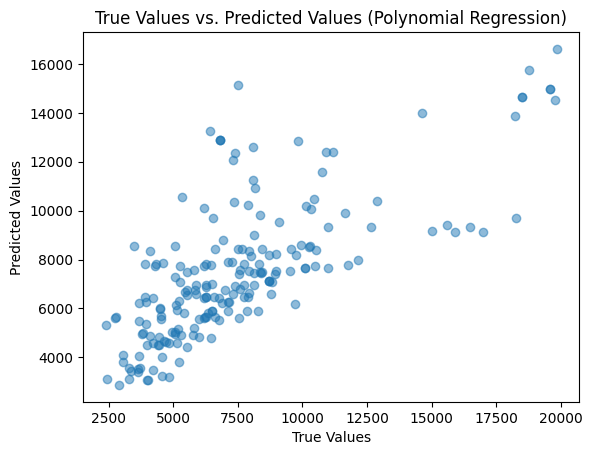

In [ ]:
y = cars['Price']

vars_numeric = ['Age', 'Mileage_Run', 'Seating_Capacity']
X_numeric = cars[vars_numeric]

vars_cat = ['Fuel_Type', 'No_of_Owners', 'Transmission_Type']
X_cat = pd.get_dummies(cars[vars_cat], drop_first=True, dtype=int)


X_both = pd.concat([X_numeric, X_cat], axis=1)

degree = 2
poly = PolynomialFeatures(degree=degree)


X_both_poly = poly.fit_transform(X_both)


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_both_poly, y, test_size=0.2, random_state=100)

reg_poly = LinearRegression().fit(X_train_poly, y_train)

y_pred_poly = reg_poly.predict(X_test_poly)


plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.title('True Values vs. Predicted Values (Polynomial Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

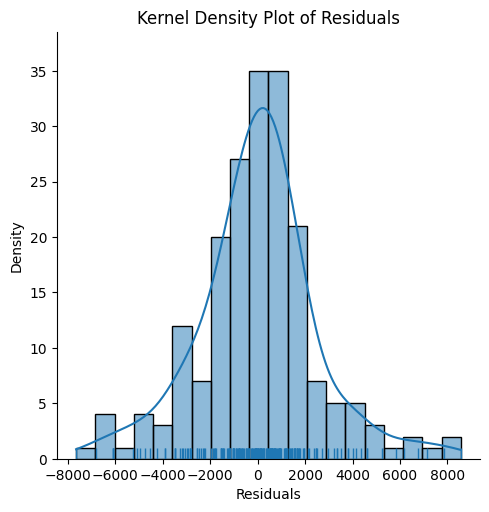

In [ ]:
residuals = y_test - y_pred_poly


sns.displot(residuals, kde=True, rug=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The kernal density plot is more centered around zero. The scatterplot is not very diagonal or linear.

**Question 1.7**

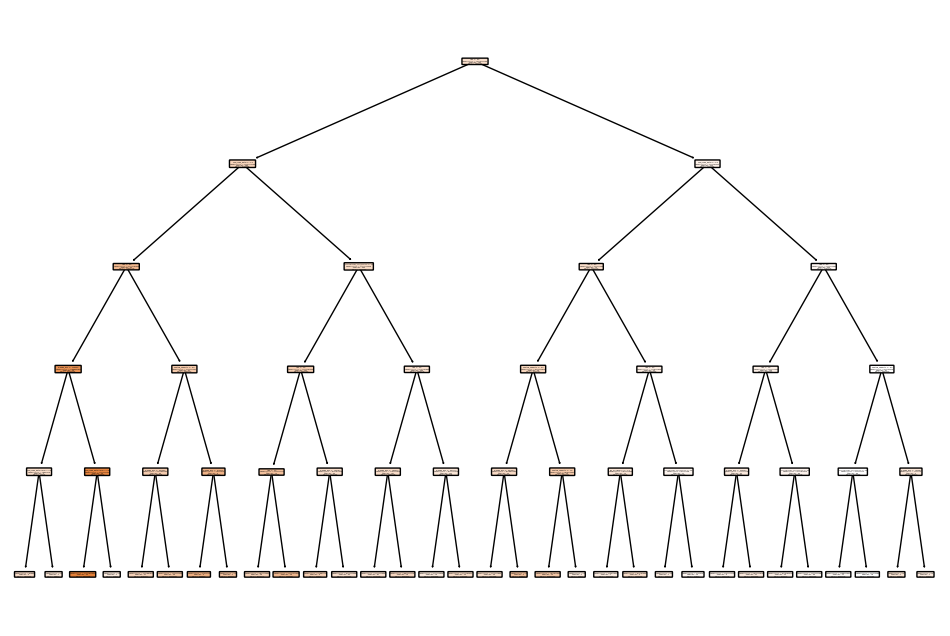

R^2: 0.6447852967326367


In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree


y = cars['Price']
X_numeric = cars[['Age', 'Mileage_Run', 'Seating_Capacity']]
X_cat = cars[['Fuel_Type', 'No_of_Owners', 'Transmission_Type']]


X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dtype=int)

X = pd.concat([X_numeric, X_cat_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)


cart = DecisionTreeRegressor(max_depth = 5)
cart.fit(X_train, y_train)


y_hat = cart.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(cart, feature_names=X_train.columns.to_list(), filled=True, rounded=True)
plt.show()

SSE = np.sum((y_test - y_hat) ** 2)
TSS = np.sum((y_test - y_train.mean()) ** 2)
Rsq = 1 - SSE / TSS
print('R^2:', Rsq)



With a max depth of 5, my R^2 reached 0.6447 which is 0.14 higher than the R^2 I was able to reach with linear models.

**Question 1.8**

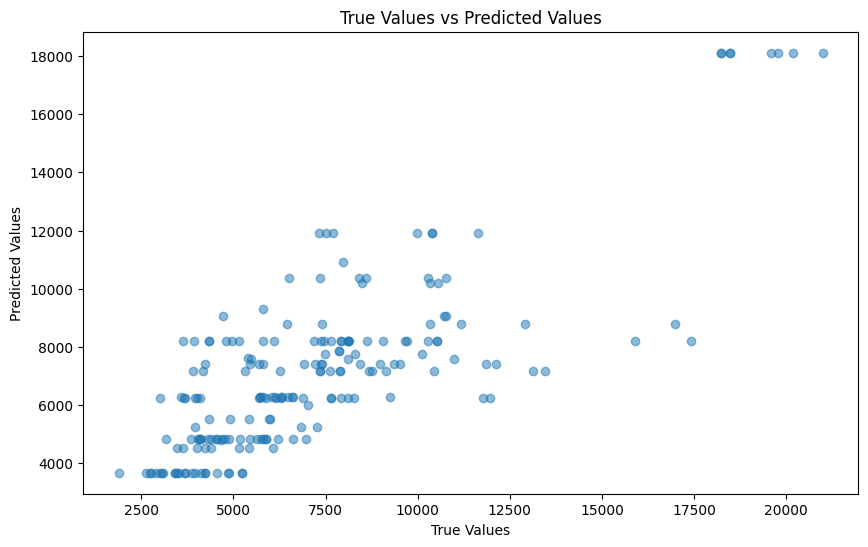

In [ ]:
y_hat = cart.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

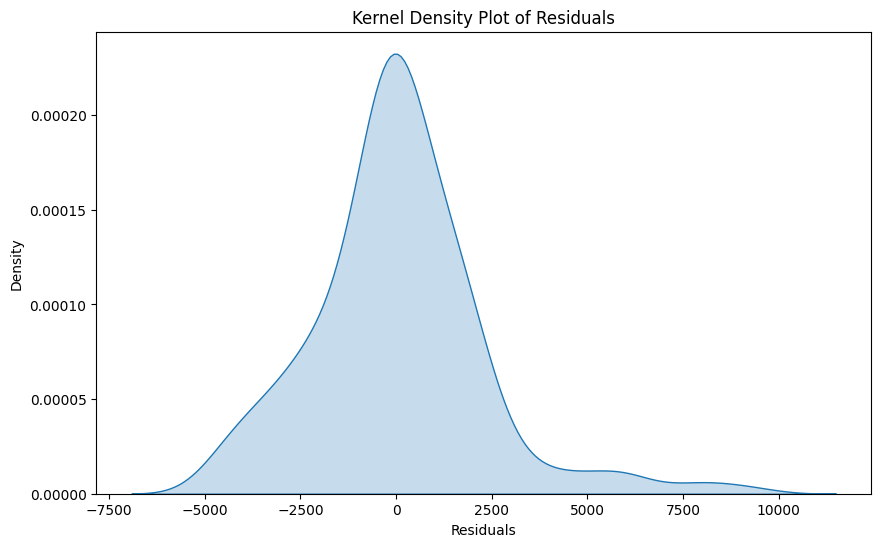

In [ ]:
residuals = y_test - y_hat

plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

**Question 1.9**

The decision tree reached a higher R^2 but based on the kernel density plot and the scatterplot, the linear models performed better as they had a better bell shape around 0 and also more linear formation on the scatterplot.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Question 3.1**

In [92]:
choice = pd.read_csv("assignment4/data/contraception_hw.csv")
print(choice.columns)
pd.crosstab(choice['method'], choice['numberChildren'])

Index(['Unnamed: 0', 'age', 'edu', 'edu_spouse', 'numberChildren', 'religion',
       'working', 'spouse_occupation', 'standardOfLivingIndex',
       'mediaExposure', 'method'],
      dtype='object')


numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


It appears that couples who are on long term contraception have the least number of children while couples with no contraception account for the most children. Interestingly, there are couples who use short term contraception that have the most number of children in this dataset.

**Question 3.2**

In [95]:
y = choice['method']
X = choice.drop(['method'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

**Question 3.3**

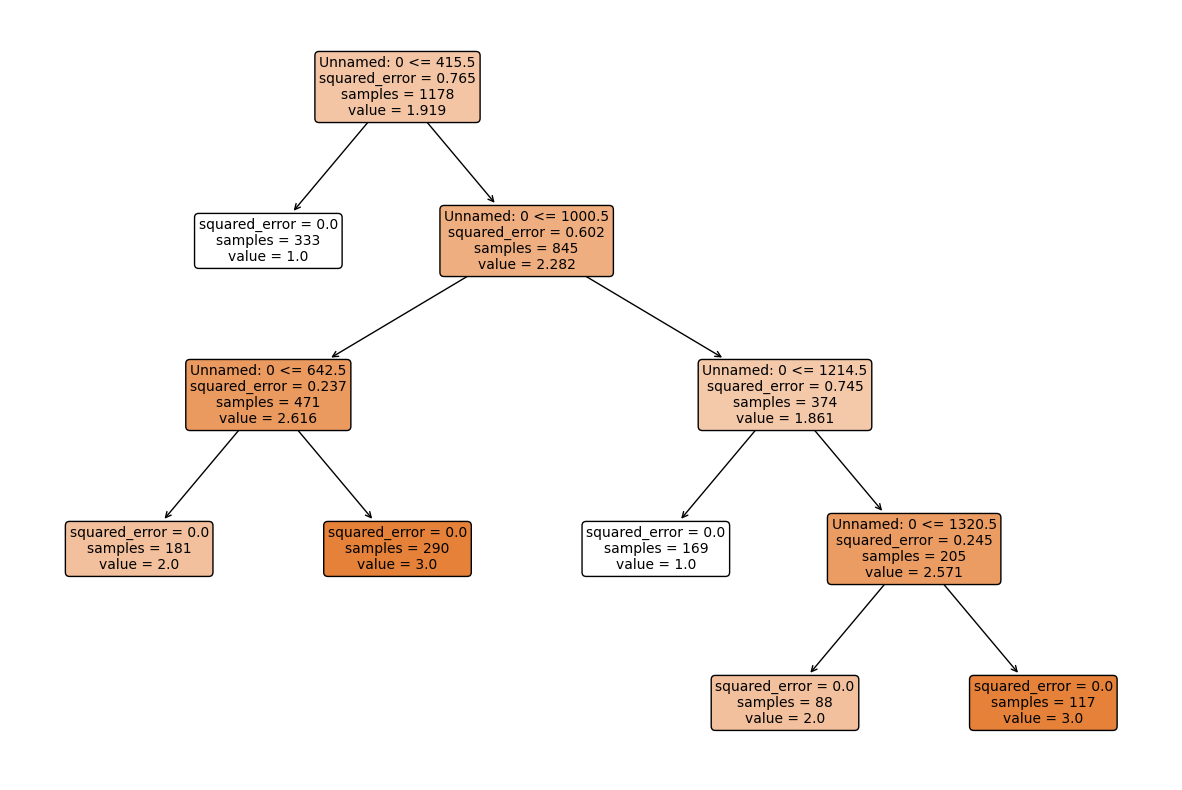

In [91]:
regressor = DecisionTreeRegressor(random_state=100, max_depth=4)

regressor.fit(X_train, y_train)



plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

Some of the values are a prediction of the method while others, like 2.571 and 1.862 do not provide a helpful prediction.

**Question 3.4**

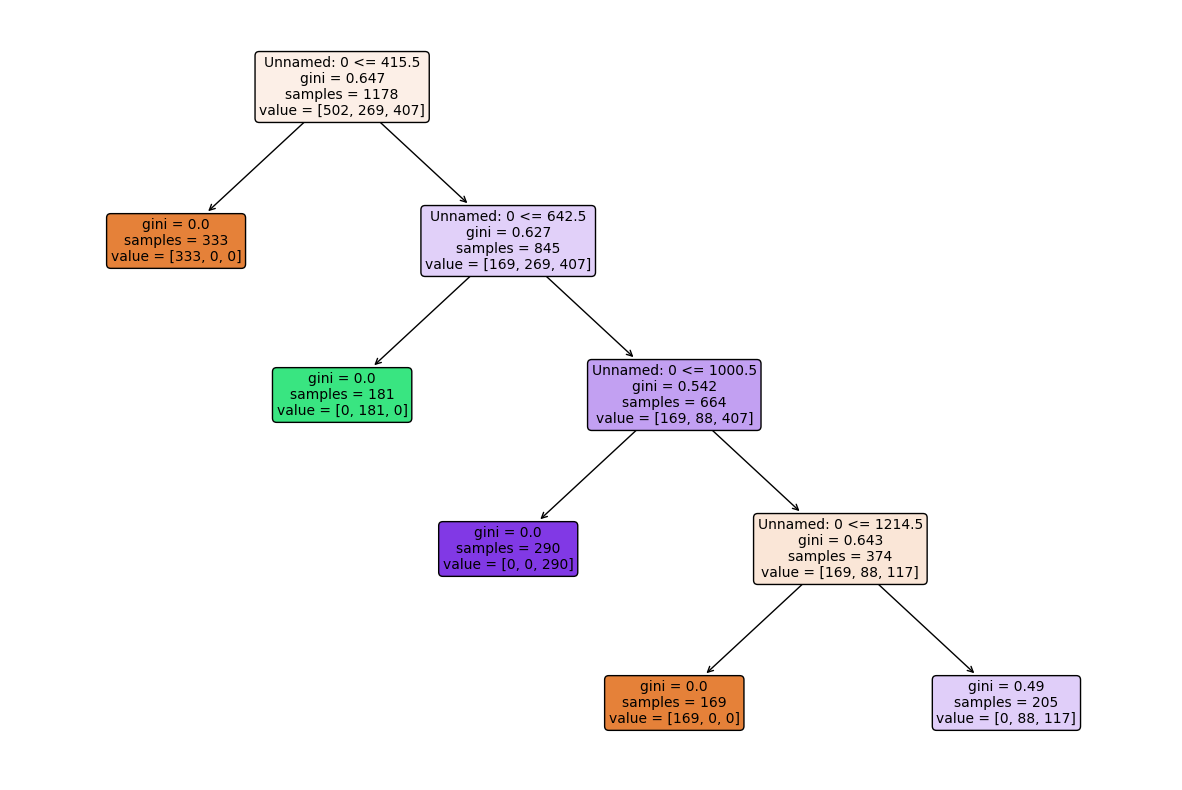

In [94]:
classifier = DecisionTreeClassifier(random_state=100, max_depth=4)

classifier.fit(X_train, y_train)



plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

**Question 3.5**

In [99]:
classifier = DecisionTreeClassifier(random_state = 100)

classifier.fit(X_train, y_train)

y_hat = classifier.predict(X_test)


tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  1.0 



col_0,1,2,3
method,,,
1,127,0,0
2,0,64,0
3,0,0,104


I'm getting 100% accuracy and I'm not sure why. I used the code directly from the trees.ipynb

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?